 Similar Network Analytics ....
............................ Inside Data Loading .......................................................
Customers dataset has 440 samples with 6 features each.
............................Inside Data Exploration .......................................................


,ProductFamily1,ProductFamily2,ProductFamily3,ProductFamily4,ProductFamily5,ProductFamily6
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,ProductFamily1,ProductFamily2,ProductFamily3,ProductFamily4,ProductFamily5,ProductFamily6,total
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


   ProductFamily1  ProductFamily2  ProductFamily3  ProductFamily4  \
0           12669            9656            7561             214   
1            7057            9810            9568            1762   
2            6353            8808            7684            2405   
3           13265            1196            4221            6404   
4           22615            5410            7198            3915   
5            9413            8259            5126             666   
6           12126            3199            6975             480   
7            7579            4956            9426            1669   
8            5963            3648            6192             425   
9            6006           11093           18881            1159   

   ProductFamily5  ProductFamily6  total  
0            2674            1338  34112  
1            3293            1776  33266  
2            3516            7844  36610  
3             507            1788  27381  
4            1777        

,ProductFamily1,ProductFamily2,ProductFamily3,ProductFamily4,ProductFamily5,ProductFamily6
0,9198,27472,32034,3232,18906,5130
1,3067,13240,23127,3941,9959,731
2,16225,1825,1765,853,170,1067


Chosen samples of  customers dataset with totals:


,ProductFamily1,ProductFamily2,ProductFamily3,ProductFamily4,ProductFamily5,ProductFamily6,total
0,9198,27472,32034,3232,18906,5130,95972
1,3067,13240,23127,3941,9959,731,54065
2,16225,1825,1765,853,170,1067,21905


............................Inside Feature Relevance .......................................................
ProductFamily5
0.906312298673
............................Inside Feature Distributions .......................................................


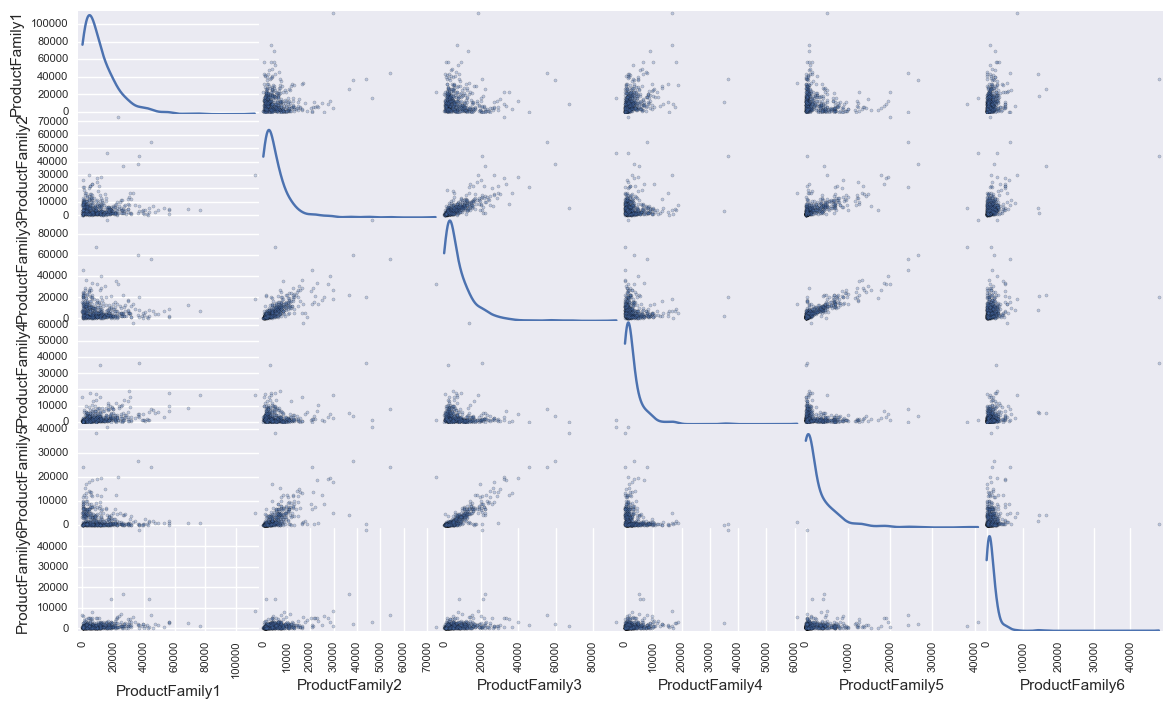

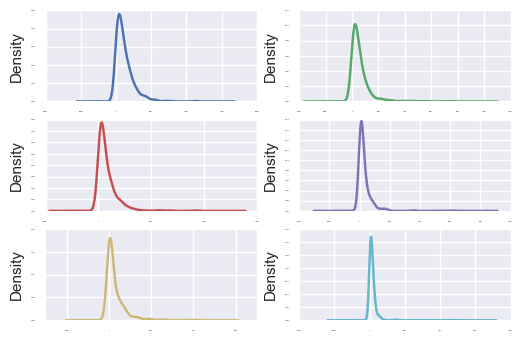

............................End Feature Distributions .......................................................
............................ Inside Normalize / Feature scalaing using Log .......................................................


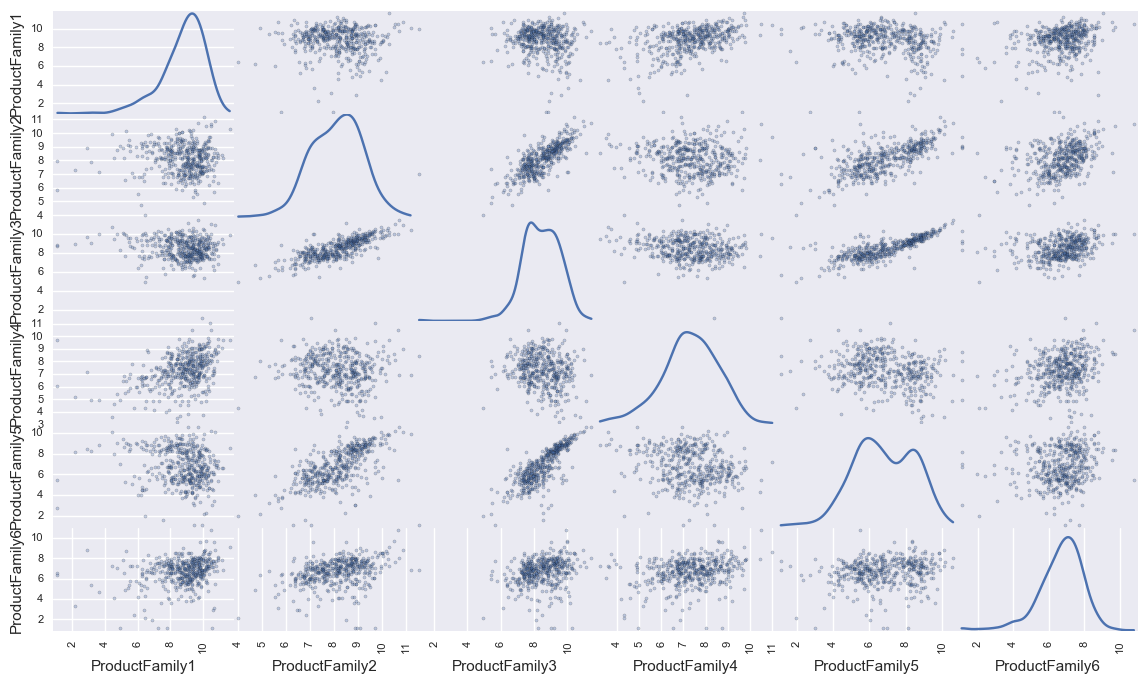

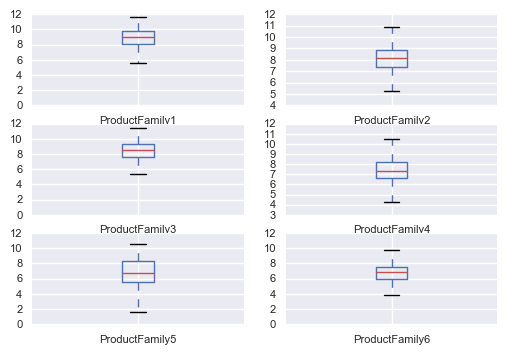

,ProductFamily1,ProductFamily2,ProductFamily3,ProductFamily4,ProductFamily5,ProductFamily6
0,9.126741,10.220923,10.374553,8.080856,9.847235,8.542861
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,9.694309,7.509335,7.475906,6.748760,5.135798,6.972606


............................ End Normalize / Feature scalaing using Log .......................................................
............................Outliers removal .......................................................
Data points considered outliers for the feature 'ProductFamily1':


,ProductFamily1,ProductFamily2,ProductFamily3,ProductFamily4,ProductFamily5,ProductFamily6
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'ProductFamily2':


,ProductFamily1,ProductFamily2,ProductFamily3,ProductFamily4,ProductFamily5,ProductFamily6
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'ProductFamily3':


,ProductFamily1,ProductFamily2,ProductFamily3,ProductFamily4,ProductFamily5,ProductFamily6
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'ProductFamily4':


,ProductFamily1,ProductFamily2,ProductFamily3,ProductFamily4,ProductFamily5,ProductFamily6
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'ProductFamily5':


,ProductFamily1,ProductFamily2,ProductFamily3,ProductFamily4,ProductFamily5,ProductFamily6
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'ProductFamily6':


,ProductFamily1,ProductFamily2,ProductFamily3,ProductFamily4,ProductFamily5,ProductFamily6
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[38, 57, 65, 65, 66, 66, 75, 75, 81, 86, 95, 96, 98, 109, 128, 128, 137, 142, 145, 154, 154, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412, 420, 429, 439]
[65, 66, 75, 128, 154]
(440, 6)
(435, 6)
............................End Outliers removal .......................................................
............................PCA .......................................................


,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,4.0512,2.1537,0.5577,0.2903,-0.0713,0.0530
1,2.9903,0.3645,0.2521,1.5653,-0.1922,-0.1244
2,-1.9406,0.2418,-0.2884,-1.2041,-0.0917,0.1492


,Dimension 1,Dimension 2
0,4.0512,2.1537
1,2.9903,0.3645
2,-1.9406,0.2418


   Dimension 1  Dimension 2
0     1.757983    -0.009711
1     1.788665     0.812251
2     1.883353     1.599135
3    -1.155265     1.405201
4     0.784786     2.394294
5     1.085043     0.324315
6     1.128640    -0.262863
7     1.567236     0.901014
8     0.863567    -0.664968
9     2.873382     0.677438
............................Inside Clustering .......................................................
7 clusters: 0.36313
6 clusters: 0.36104
5 clusters: 0.35221
4 clusters: 0.3339
3 clusters: 0.39689
2 clusters: 0.42628
............................End Clustering .......................................................
............................Identify Centers .......................................................


,ProductFamily1,ProductFamily2,ProductFamily3,ProductFamily4,ProductFamily5,ProductFamily6,total
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0,30558.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0,16304.0


NameError: name 'outliers' is not defined

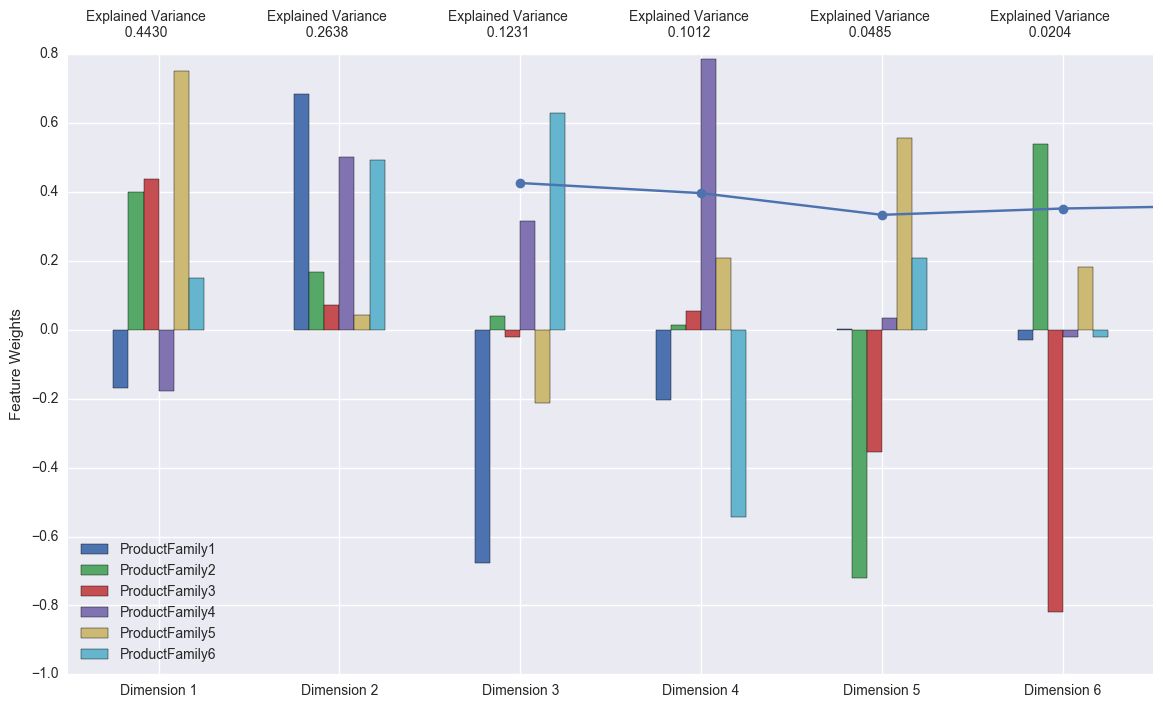

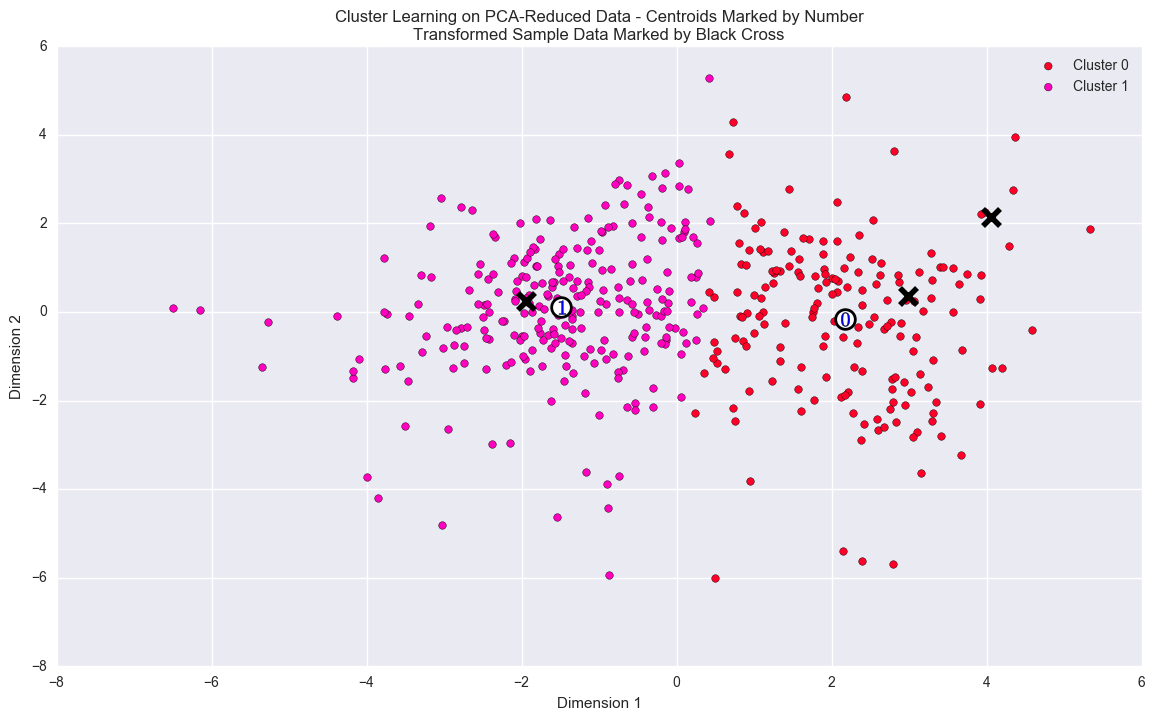

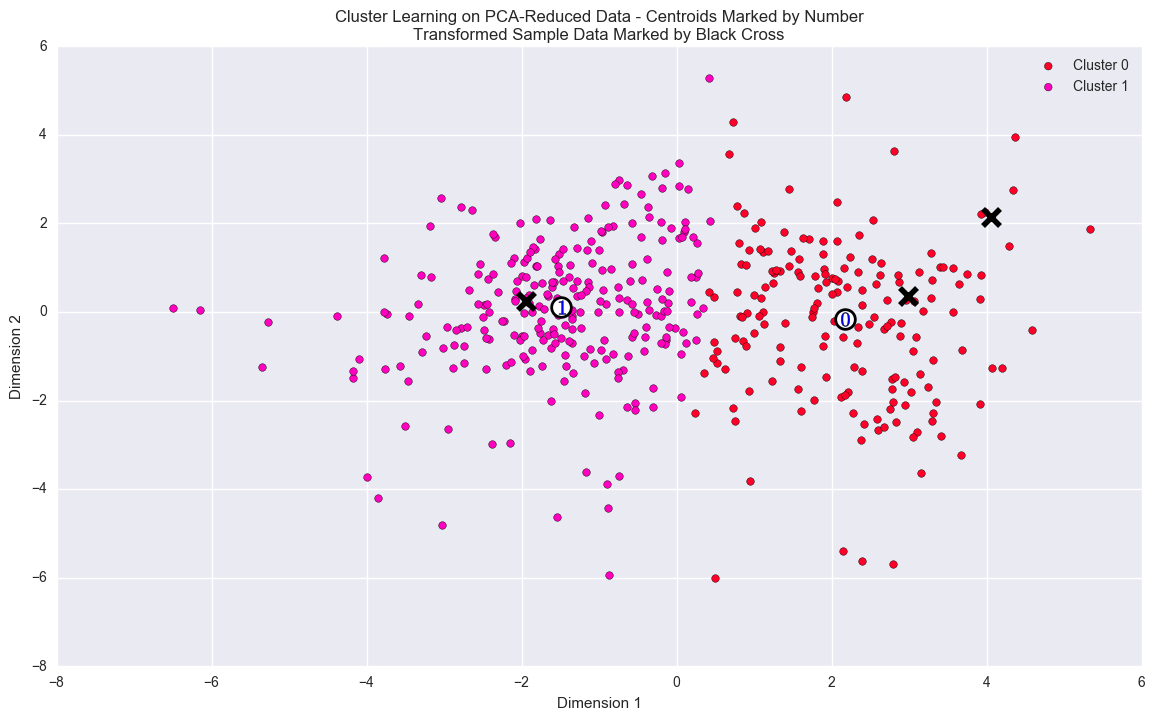

In [3]:
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
get_ipython().magic(u'matplotlib inline')

import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
#get_ipython().magic(u'matplotlib inline')


def load() :

    print "............................ Inside Data Loading ......................................................."
    # Load the wholesale customers dataset
    try:
        data = pd.read_csv("product_vector.csv")
        temp = pd.read_csv("product_vector.csv")
        data.drop(['Customer','NetoworkGroupId'], axis = 1, inplace = True)
        temp.drop(['Customer','NetoworkGroupId'], axis = 1, inplace = True)
        print "Customers dataset has {} samples with {} features each.".format(*data.shape)
    except:
        print "Dataset could not be loaded. Is the dataset missing?"

    return data, temp

def explore(data) :

    print "............................Inside Data Exploration ......................................................."

    # Display a description of the dataset
    display(data.describe())

    #Choosing a temp variable just to get the 'total' of each individual customers
    temp['total'] = temp.sum(axis=1)

    display(temp.describe())

    print temp[:10]

def selectSample() :

    indices = []

    indices.append(92)
    indices.append(200)
    indices.append(150)

    # Create a DataFrame of the chosen samples
    samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
    print "Chosen samples of  customers dataset:"
    display(samples)

    # Create a DataFrame of the chosen samples
    samples1 = pd.DataFrame(temp.loc[indices], columns = temp.keys()).reset_index(drop = True)
    print "Chosen samples of  customers dataset with totals:"
    display(samples1)

    return samples

def featureRelevance(data) :

    print "............................Inside Feature Relevance ......................................................."

    from sklearn.tree import DecisionTreeRegressor
    from sklearn import cross_validation
    from sklearn.metrics import r2_score

    # Make a copy of the DataFrame, using the 'drop' function to drop the given feature

    target_cols = data.columns[-2]
    print target_cols
    y = data[target_cols]

    new_data = data.copy(deep=True)
    new_data.drop(['ProductFamily3'], axis = 1, inplace = True)

    X = new_data

    seed = 7
    t_size = 0.25


    # Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y,
      test_size=t_size, random_state=seed)


    # Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state = seed)
    regressor.fit(X_train, y_train)

    # Report the score of the prediction using the testing set
    predictions = regressor.predict(X_test)
    score = regressor.score(X_test, y_test)
    print score

def featureDistributions(data) :

    print "............................Inside Feature Distributions ......................................................."

    import matplotlib.pyplot as plt
    import seaborn as sns

    # Produce a scatter matrix for each pair of features in the data
    pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

    # density
    data.plot(kind='density', subplots=True, layout=(3,2), sharex=False, legend=False,
    fontsize= 1)
    plt.show()

    ## TBD : Krishnan : get the product families / vector names dynamically from input data set
    names = ['ProductFamily1', 'ProductFamily2', 'ProductFamily3', 'ProductFamily4', 'ProductFamily5' ,'ProductFamily6' ]

    # correlation

    corr = data.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    #with sns.axes_style("white"):
    #    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu')
    #    plt.xticks(rotation=45, ha='center');

    print "............................End Feature Distributions ......................................................."

def normalizeFeatures(data,samples) :

    print "............................ Inside Normalize / Feature scalaing using Log ......................................................."

    import matplotlib.pyplot as plt

    normalizedData = np.log(data)
    log_samples = np.log(samples)

    # Produce a scatter matrix for each pair of newly-transformed features
    pd.scatter_matrix(normalizedData, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

    #reviewer suggested to use log_data.boxplot(); but it didn't work well so I keeping my original.

    # box and whisker plots
    normalizedData.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False,
    fontsize=8)
    plt.show()
    display(log_samples)

    print "............................ End Normalize / Feature scalaing using Log ......................................................."
    return normalizedData, log_samples


def removeOutliers(normalizedData) :

    print "............................Outliers removal ......................................................."

    from scipy import stats
    #from  more_itertools import unique_everseen

    # Keep outlier indices in a list and examine after looping thru the features
    idx = []


    # For each feature find the data points with extreme high or low values
    for feature in normalizedData.keys():

        #  Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(normalizedData[feature], 25)

        #  Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(normalizedData[feature], 75)

        #  Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = 1.5*(Q3 - Q1)

        # Display the outliers
        print "Data points considered outliers for the feature '{}':".format(feature)
        display(normalizedData[~((normalizedData[feature] >= Q1 - step) & (normalizedData[feature] <= Q3 + step))])

        # Gather the indexes of all the outliers
        idx += normalizedData[~((normalizedData[feature] >= Q1 - step) & (normalizedData[feature] <= Q3 + step))].index.tolist()

    print(sorted(idx))

    # OPTIONAL: Select the indices for data points you wish to remove
    outliers  = []
    #outliers = list(unique_everseen(idx))

    import collections
    outliers = [item for item, count in collections.Counter(idx).items() if count > 1]

    print(sorted(outliers))

    # Remove the outliers, if any were specified
    good_data = normalizedData.drop(normalizedData.index[outliers]).reset_index(drop = True)

    print(normalizedData.shape)
    print(good_data.shape)

    print "............................End Outliers removal ......................................................."

    return good_data



def performPCA(good_data,log_samples) :

    print "............................PCA ......................................................."

    from sklearn.decomposition import PCA

    # Apply PCA to the good data with the same number of dimensions as features

    pca = PCA(n_components=6).fit(good_data)

    # Apply a PCA transformation to the sample log-data
    pca_samples = pca.transform(log_samples)
    #pca.fit(log_samples)

    # Generate PCA results plot
    pca_results = rs.pca_results(good_data, pca)

    # cumulative explaned variance
    #print '\n', np.cumsum(pca.explained_variance_ratio_)

    # Display sample log-data after having a PCA transformation applied
    display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))


    # TODO: Fit PCA to the good data using only two dimensions
    pca = PCA(n_components=2).fit(good_data)

    # TODO: Apply a PCA transformation the good data
    reduced_data = pca.transform(good_data)

    # TODO: Apply a PCA transformation to the sample log-data
    pca_samples = pca.transform(log_samples)

    # Create a DataFrame for the reduced data
    reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

    display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))
    print reduced_data[:10]

    return pca,reduced_data,pca_samples

def performClustering(reduced_data,pca_samples) :

    print "............................Inside Clustering ......................................................."

    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score

    #keep the scores for each cluster size
    sil_scores = []

    random_state = 7

    for i in range(7,1,-1):
        clusterer = KMeans(i, random_state=random_state).fit(reduced_data)
        # Predict the cluster for each data point
        preds = clusterer.predict(reduced_data)

        # Find the cluster centers
        centers = clusterer.cluster_centers_

        # Predict the cluster for each transformed sample data point
        sample_preds = clusterer.predict(pca_samples)

        # Calculate the mean silhouette coefficient for the number of clusters chosen
        score = silhouette_score(reduced_data, preds)
        sil_scores.append(score)
        print i, 'clusters:', score.round(5)

    # plot the scores
    import matplotlib.pyplot as plt
    _ = plt.plot(np.arange(7,1,-1), sil_scores, '-o')

    print "............................End Clustering ......................................................."

    rs.cluster_results(reduced_data, preds, centers, pca_samples)

    return preds,sample_preds, centers, pca_samples

def identifyCenter(pca,reduced_data, preds, centers, pca_samples) :

    print "............................Identify Centers ......................................................."

    rs.cluster_results(reduced_data, preds, centers, pca_samples)

    log_centers = pca.inverse_transform(centers)
    true_centers = np.exp(log_centers)

    # Display the true centers
    segments = ['Segment {}'.format(i) for i in range(0,len(centers))]

    true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
    true_centers.index = segments
    true_centers['total'] = true_centers.sum(axis=1)

    display(true_centers)

    #true_centers.plot(kind = 'bar', figsize = (10, 4))

def displayPredictons(sample_preds,outliers,pca_samples) :

    #Display the predictions
    #print sample_preds

    for i, pred in enumerate(sample_preds):
        print "Sample point", i, "predicted to be in Cluster", pred

    rs.channel_results(reduced_data, outliers, pca_samples)


if __name__ == '__main__':
    
    print " Similar Network Analytics ...."
    
    #1oad data
    data, temp = load()
    
    #explore the data
    explore(data)
    
    #select sample data so that later we can confirm the classfication making sense
    samples = selectSample()
    
    # Find any relevance between vectors. For example, is there any relance between customers
    # buying Product Family1 vs Product Family 6
    featureRelevance(data)
    
    # Find out how each vector is related to each other.  For example, 
    # how is Product Family1 and Product Family 3 are related.
    featureDistributions(data)
    
    #Normalize the data. For example, one Product Family range is veru small compared to other
    # it is better to normalize
    normalizedData,log_samples = normalizeFeatures(data,samples)
    
    # Remove Outliers
    good_data = removeOutliers(normalizedData)
    
    # perform PCA
    pca,reduced_data,pca_samples = performPCA(good_data,log_samples)
 
    # perform Clustering
    preds, sample_preds,centers, pca_samples = performClustering(reduced_data,pca_samples)
    
    # identify Cluster Center
    identifyCenter(pca,reduced_data, preds, centers, pca_samples)
  
    # Display Predictions for the sample
    displayPredictons(sample_preds,outliers,pca_samples)



